In [1]:
from pynq import Overlay, allocate

overlay = Overlay("./sobel_resize.bit")


In [2]:
overlay?

In [2]:
sobel_resize = overlay.sobel_resize_accel_0

In [3]:
sobel_resize.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  img_inp_1 = Register(img_inp=write-only),
  img_inp_2 = Register(img_inp=write-only),
  img_out1_1 = Register(img_out1=write-only),
  img_out1_2 = Register(img_out1=write-only),
  img_out2_1 = Register(img_out2=write-only),
  img_out2_2 = Register(img_out2=write-only),
  rows_in = Register(rows_in=write-only),
  cols_in = Register(cols_in=write-only),
  rows_out = Register(rows_out=write-only),
  cols_out = Register(cols_out=write-only)
}

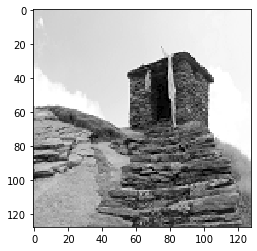

In [4]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import time
import copy
gray = cv.imread("./128x128.png", cv.IMREAD_GRAYSCALE)
plt.imshow(gray, cmap="gray")

In [5]:
rows, cols = gray.shape
#新尺寸
resize_rows=32
resize_cols=32
pixel_size = rows*cols

resize_pixel_size = resize_rows*resize_cols
input_buffer = allocate(shape=(pixel_size,), dtype='u1')
output_buffer_1 = allocate(shape=(resize_pixel_size,), dtype='u1')
output_buffer_2 = allocate(shape=(resize_pixel_size,), dtype='u1')

img_reshape = gray.reshape(pixel_size,)
np.copyto(input_buffer, img_reshape)

In [6]:
print(rows, cols)

128 128


In [7]:
sobel_resize.register_map.rows_in = rows
sobel_resize.register_map.cols_in = cols
sobel_resize.register_map.rows_out = resize_rows
sobel_resize.register_map.cols_out = resize_cols
sobel_resize.write(sobel_resize.register_map.img_inp_1.address, input_buffer.physical_address)
sobel_resize.write(sobel_resize.register_map.img_out1_1.address, output_buffer_1.physical_address)
sobel_resize.write(sobel_resize.register_map.img_out2_1.address, output_buffer_2.physical_address)

In [8]:
sobel_resize.write(0x0,0x1)

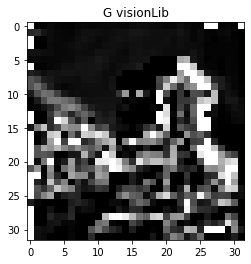

In [9]:
G_visionLib = output_buffer_1.reshape(resize_rows, resize_cols) + output_buffer_2.reshape(resize_rows, resize_cols)
plt.title("G visionLib")
plt.imshow(G_visionLib, cmap="gray")